In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import bq_helper
from bq_helper import BigQueryHelper

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

set_matplotlib_formats('retina')
%matplotlib inline

In [3]:
google_analytics = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="data:google_analytics_sample")

Using Kaggle's public dataset BigQuery integration.


In [7]:
from google.cloud import bigquery
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


In [4]:
bq_assistant = BigQueryHelper("bigquery-public-data", "google_analytics_sample")
bq_assistant.list_tables()

Using Kaggle's public dataset BigQuery integration.


['ga_sessions_20160801',
 'ga_sessions_20160802',
 'ga_sessions_20160803',
 'ga_sessions_20160804',
 'ga_sessions_20160805',
 'ga_sessions_20160806',
 'ga_sessions_20160807',
 'ga_sessions_20160808',
 'ga_sessions_20160809',
 'ga_sessions_20160810',
 'ga_sessions_20160811',
 'ga_sessions_20160812',
 'ga_sessions_20160813',
 'ga_sessions_20160814',
 'ga_sessions_20160815',
 'ga_sessions_20160816',
 'ga_sessions_20160817',
 'ga_sessions_20160818',
 'ga_sessions_20160819',
 'ga_sessions_20160820',
 'ga_sessions_20160821',
 'ga_sessions_20160822',
 'ga_sessions_20160823',
 'ga_sessions_20160824',
 'ga_sessions_20160825',
 'ga_sessions_20160826',
 'ga_sessions_20160827',
 'ga_sessions_20160828',
 'ga_sessions_20160829',
 'ga_sessions_20160830',
 'ga_sessions_20160831',
 'ga_sessions_20160901',
 'ga_sessions_20160902',
 'ga_sessions_20160903',
 'ga_sessions_20160904',
 'ga_sessions_20160905',
 'ga_sessions_20160906',
 'ga_sessions_20160907',
 'ga_sessions_20160908',
 'ga_sessions_20160909',


In [4]:
bq_assistant.head("ga_sessions_20160801", num_rows=3)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,None,1,1470117657,1470117657,20160801,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",7194065619159478122,None,Social,Not Socially Engaged
1,None,151,1470083489,1470083489,20160801,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",8159312408158297118,None,Social,Not Socially Engaged
2,None,1,1470052694,1470052694,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 4, 'minut...",9236304747882138291,None,Social,Not Socially Engaged


In [5]:
bq_assistant.table_schema("ga_sessions_20160801")

/src/bq-helper/bq_helper.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  'fields': pd.np.nan,


,name,type,mode,description
0,visitorId,INTEGER,NULLABLE,None
1,visitNumber,INTEGER,NULLABLE,None
2,visitId,INTEGER,NULLABLE,None
3,visitStartTime,INTEGER,NULLABLE,None
4,date,STRING,NULLABLE,None
...,...,...,...,...
331,hits.publisher_infos.dfpNetworkId,STRING,NULLABLE,None
332,fullVisitorId,STRING,NULLABLE,None
333,userId,STRING,NULLABLE,None
334,channelGrouping,STRING,NULLABLE,None


In [6]:
query2 = """SELECT
source,
total_visits,
total_no_of_bounces,
( ( total_no_of_bounces / total_visits ) * 100 ) AS bounce_rate
FROM (
SELECT
trafficSource.source AS source,
COUNT ( trafficSource.source ) AS total_visits,
SUM ( totals.bounces ) AS total_no_of_bounces
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
_TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
GROUP BY
source )
ORDER BY
total_visits DESC;
        """
response2 = google_analytics.query_to_pandas_safe(query2)
response2.head(10)

,source,total_visits,total_no_of_bounces,bounce_rate
0,google,38400,19798.0,51.557292
1,(direct),19891,8606.0,43.265799
2,youtube.com,6351,4238.0,66.729649
3,analytics.google.com,1972,1064.0,53.955375
4,Partners,1788,936.0,52.348993
5,m.facebook.com,669,430.0,64.275037
6,google.com,368,183.0,49.728261
7,dfa,302,124.0,41.059603
8,sites.google.com,230,97.0,42.173913
9,facebook.com,191,102.0,53.403141


In [8]:
query7 = """SELECT
fullVisitorId,
visitId,
visitNumber,
hits.hitNumber AS hitNumber,
hits.page.pagePath AS pagePath
FROM
`bigquery-public-data.google_analytics_sample.ga_sessions_*`,
UNNEST(hits) as hits
WHERE
_TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
AND
hits.type="PAGE"
ORDER BY
fullVisitorId,
visitId,
visitNumber,
hitNumber;
        """
response7 = google_analytics.query_to_pandas_safe(query7, max_gb_scanned=10)
response7.head(10)

,fullVisitorId,visitId,visitNumber,hitNumber,pagePath
0,0000062267706107999,1499645960,1,1,/home
1,0000085059828173212,1500505105,1,1,/asearch.html
2,0000436683523507380,1500504900,1,1,/home
3,0000436683523507380,1500504900,1,2,/google+redesign/electronics/power/clip+compac...
4,0000436683523507380,1500989127,2,1,/home
5,0000436683523507380,1500989127,2,2,/google+redesign/bags/backpacks/waterproof+bac...
6,0000436683523507380,1500989127,2,3,/home
7,0000436683523507380,1500989127,2,4,/home
8,0000436683523507380,1500989127,2,5,/google+redesign/electronics
9,0000436683523507380,1500989127,2,6,/google+redesign/office/notebooks+journals/goo...


# 1. High Level Stats

Summarizing stats for 2016Q4 like Google Analytics Canned Report

In [8]:

query = """
    SELECT 
        FORMAT("%'d",COUNT(DISTINCT fullVisitorId)) AS users,
        FORMAT("%'d",SUM(totals.visits)) AS visits,
        FORMAT("%'d",SUM(totals.pageviews)) AS pageviews,
        FORMAT("%'d", SUM(totals.transactions)) AS transactions,
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
        
"""
safe_query_job = client.query(query)
high_level_aug = safe_query_job.to_dataframe()
high_level_aug

,users,visits,pageviews,transactions,revenue
0,"2,868","3,176","92,822","3,314",386199.7


For 2016Q4, there were over 3000 visits, about 93,000 pageviews and $386,000 in revenue for Google Merchandise Store.

In [9]:
#monthly traffic

query = """
    SELECT 
        DATE_TRUNC(PARSE_DATE('%Y%m%d',date), MONTH) AS month,
        SUM(totals.visits) AS visits,        
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
    GROUP BY 1
    ORDER BY 1
        
"""
safe_query_job = client.query(query)
df_1 = safe_query_job.to_dataframe()
df_1.head(3)


,month,visits,revenue
0,2016-10-01,872,113329.07
1,2016-11-01,919,119013.87
2,2016-12-01,1385,153856.76


Revenue Generated in December is almost 40% of Q4 sales, possibly due to holiday shopping surge.

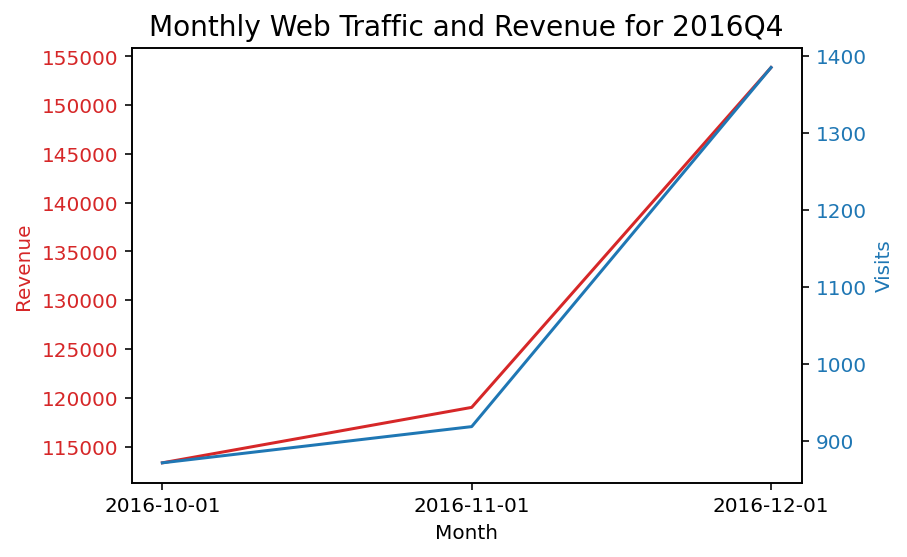

In [10]:
# plot web traffic and revenue by month for Q4

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(df_1['month'], df_1['revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Visits', color=color)  
ax2.plot(df_1['month'], df_1['visits'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Web Traffic and Revenue for 2016Q4', fontsize=14)
plt.xticks(df_1['month'],rotation=45)
plt.show()

We see some correlation between revenue and visits. However, each visit can be different based on time spent or pages visited on the website. 
This aspect requires more diving deep.

## 2. Website Acquisition

Overview of top channels sending visitors to Google Merchandise Store

In [13]:

query = """
    SELECT
        channelGrouping as channel,
        SUM(totals.totalTransactionRevenue)/1000000 AS revenue,
        SUM(totals.transactions) AS transactions,
        COUNT(DISTINCT fullVisitorId) AS users,
        SUM(totals.visits) AS sessions,
        SUM(totals.pageviews) AS pageviews
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
    GROUP BY
        1
    ORDER BY
        2 DESC
"""
safe_query_job = client.query(query)
df_2 = safe_query_job.to_dataframe()
df_2.head(3)

,channel,revenue,transactions,users,sessions,pageviews
0,Referral,182578.60,1540,1331,1470,42829
1,Direct,128141.06,568,456,539,16132
2,Organic Search,93376.88,991,905,956,28247


Text(0.5, 1.0, 'Total Pageviews by Channel')

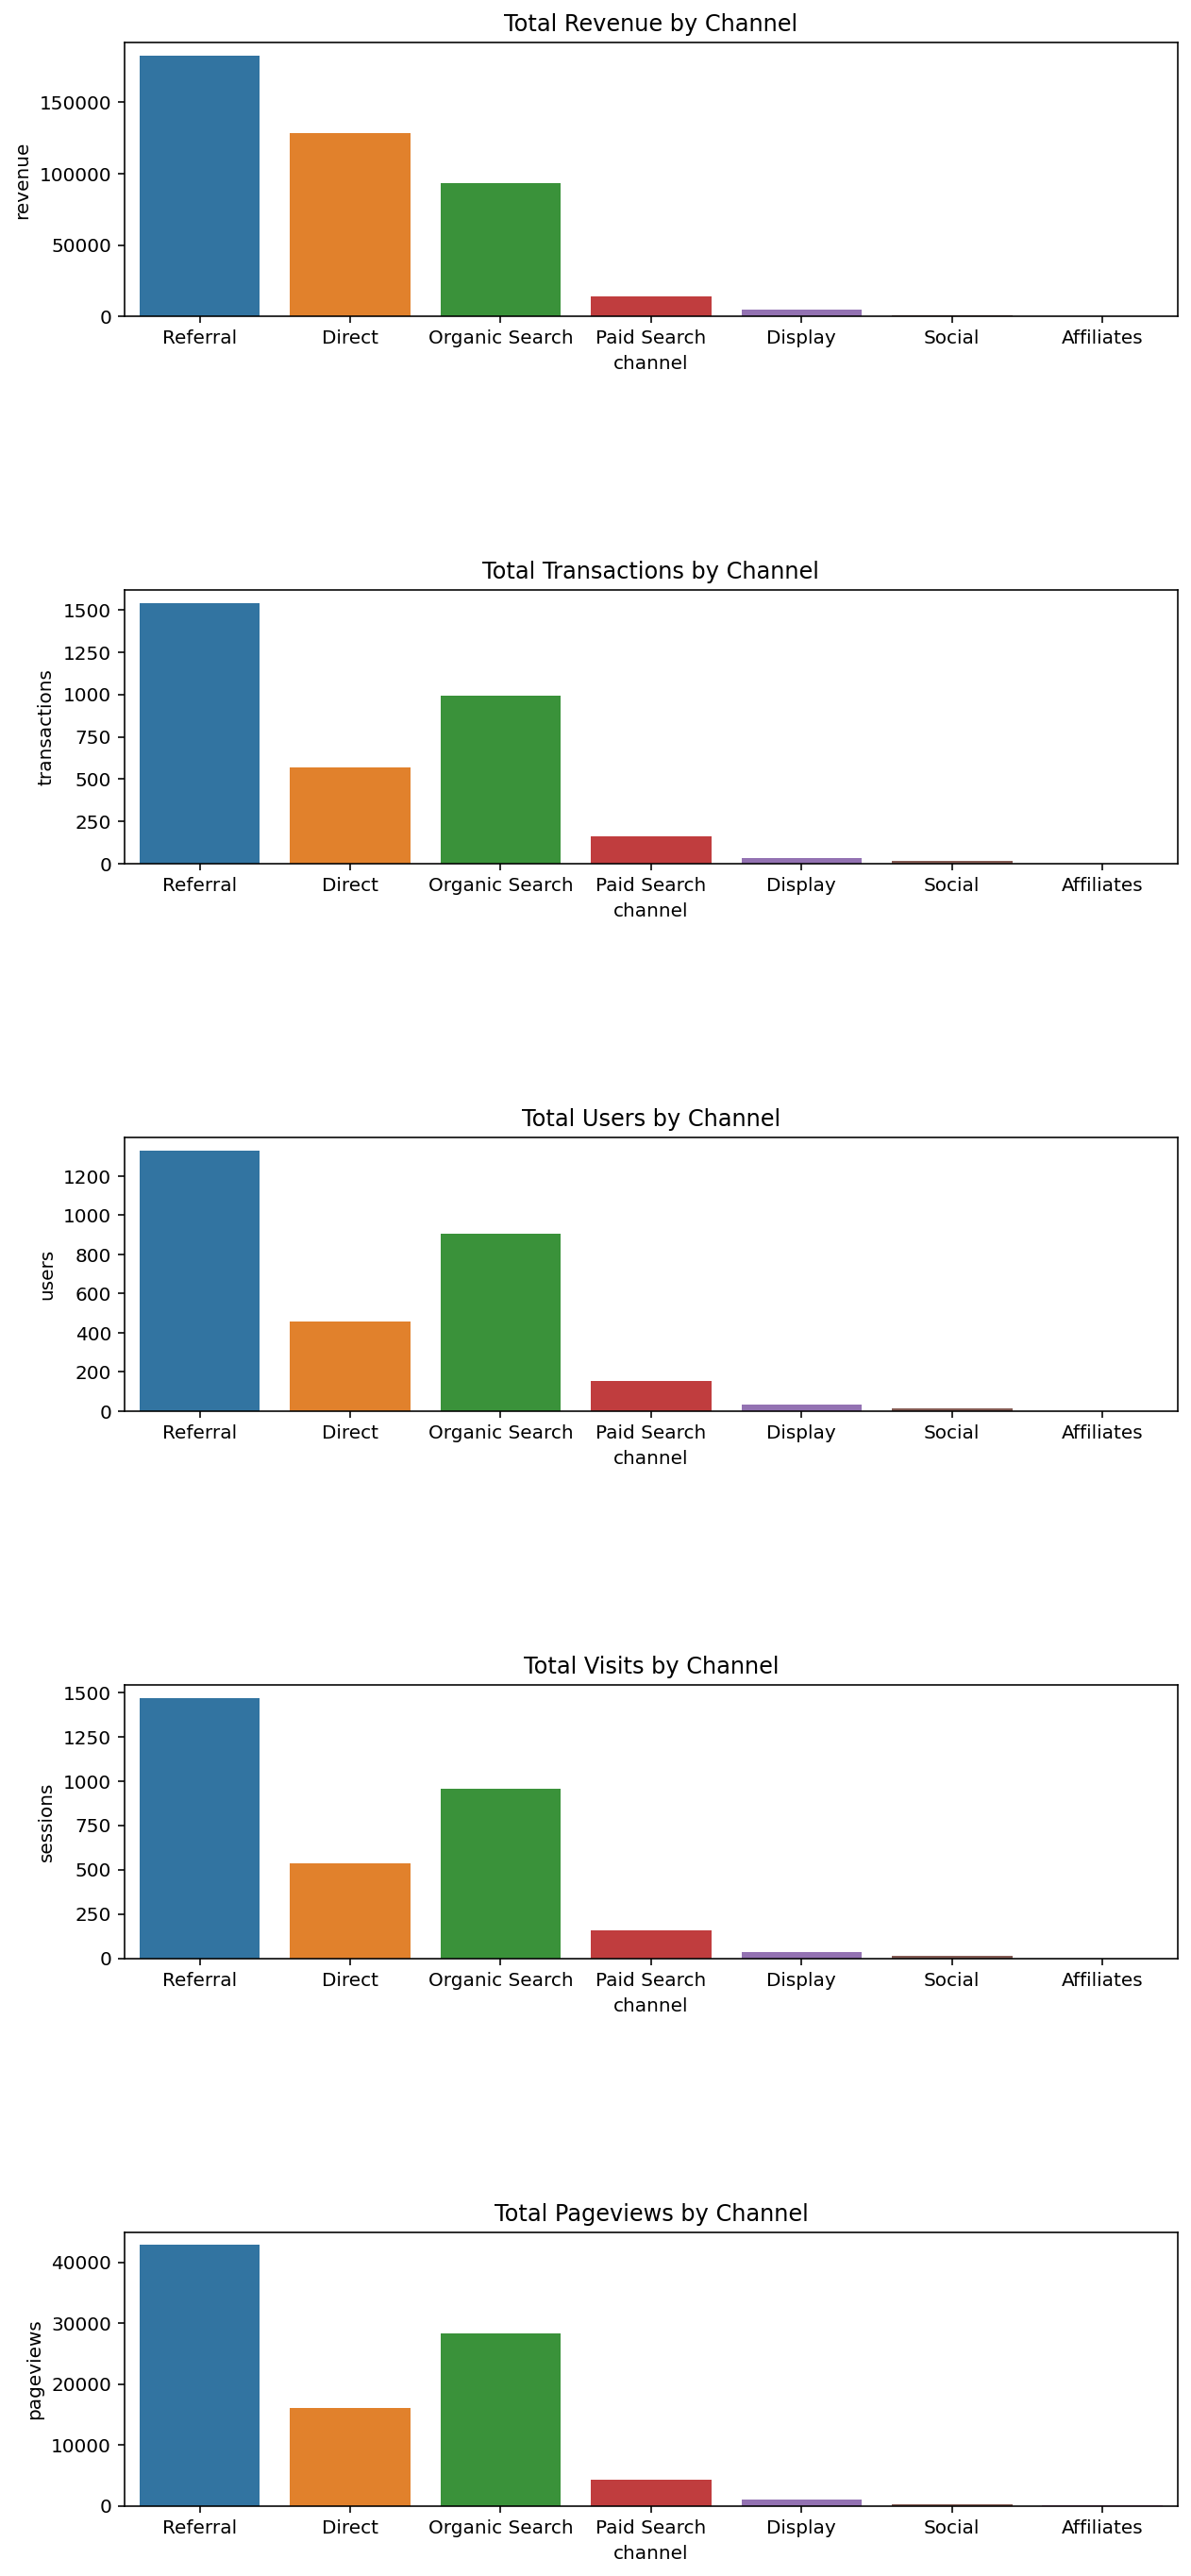

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,24))
fig.subplots_adjust(hspace=1)

sns.barplot(x='channel',
            y='revenue',
            data=df_2,
            estimator=sum,
            ax=ax1)

sns.barplot(x='channel',
            y='transactions',
            data=df_2,
            estimator=sum,
            ax=ax2)

sns.barplot(x='channel',
            y='users',
            data=df_2,
            estimator=sum,
            ax=ax3)

sns.barplot(x='channel',
            y='sessions',
            data=df_2,
            estimator=sum,
            ax=ax4)

sns.barplot(x='channel',
            y='pageviews',
            data=df_2,
            estimator=sum,
            ax=ax5)

ax1.set_title('Total Revenue by Channel')
ax2.set_title('Total Transactions by Channel')
ax3.set_title('Total Users by Channel')
ax4.set_title('Total Visits by Channel')
ax5.set_title('Total Pageviews by Channel')

Referral traffic has generated most revenue and attracted most users to the Google Merchndise Store.
Direct traffic has generated more revenue than Organic Search and latter has let to more users and transactions.

## 3. User Behavior

**Since we found that visit and revenue look correlated, lets find out if users are more likely to transact based on their length of visit or more browsing/number of pageviews.**

For this purpose, we will find correlation coefficient for 'pageviews' and 'average time on site' as well as 'transactions' features and generate a heatmap to understand.

In [15]:
# creating data frame with features
query = """
    SELECT 
        fullVisitorId AS userID,
        AVG(totals.timeOnSite) As avgTimeOnSite,
        SUM(totals.pageviews) AS pageviews,
        SUM(totals.transactions) AS transactions
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
    GROUP BY
        1
    ORDER BY 1
        
"""
safe_query_job = client.query(query)
df_3 = safe_query_job.to_dataframe()
df_3.head(4)

,userID,avgTimeOnSite,pageviews,transactions
0,0000010278554503158,194.0,8.0,NaN
1,0000020424342248747,297.0,13.0,NaN
2,0000152474579038632,162.0,2.0,NaN
3,0000174067426171406,559.5,30.0,NaN


In [16]:
# replacing na values with 0
df_3['transactions'].fillna(0, inplace=True)
df_3.head(4)

,userID,avgTimeOnSite,pageviews,transactions
0,0000010278554503158,194.0,8.0,0.0
1,0000020424342248747,297.0,13.0,0.0
2,0000152474579038632,162.0,2.0,0.0
3,0000174067426171406,559.5,30.0,0.0


In [17]:
pearsoncorr = df_3.corr(method='pearson')
pearsoncorr

,avgTimeOnSite,pageviews,transactions
avgTimeOnSite,1.000000,0.454428,0.242365
pageviews,0.454428,1.000000,0.525083
transactions,0.242365,0.525083,1.000000


<AxesSubplot:>

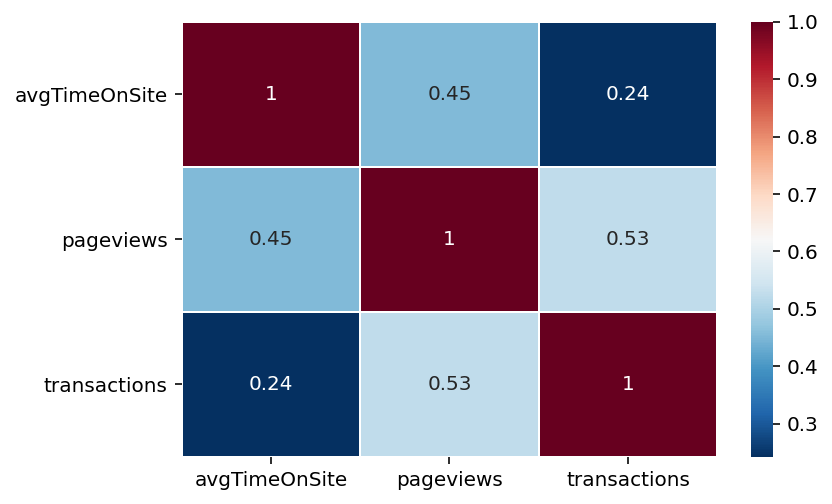

In [18]:
# creating heat map of features
sns.heatmap(pearsoncorr,
              xticklabels=pearsoncorr.columns,
              yticklabels=pearsoncorr.columns,
              cmap='RdBu_r',
              annot=True,
              linewidth=0.5)

As seen in the heatmap, pageviews are more positively correlated with transactions than avg time on site.
This could indicate **site browsing as key indicator that can lead to transactions.**

### Most Visited Pages on site

/google+redesign/ has most pageviews followed by /home.

In [19]:
# creating data frame with features
query = """
    SELECT
        hits.page.pagePathLevel1 AS pagePath,
        SUM(totals.pageviews) AS pageviews
    FROM
      `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
      UNNEST(hits) AS hits
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
"""
safe_query_job = client.query(query)
df_4 = safe_query_job.to_dataframe()
df_4

,pagePath,pageviews
0,/google+redesign/,13059899
1,/home,2320076
2,/basket.html,2251571
3,/store.html,693064
4,/signin.html,373752
5,/asearch.html,342792
6,/yourinfo.html,309919
7,/payment.html,305266
8,/ordercompleted.html,214672
9,/revieworder.html,144310


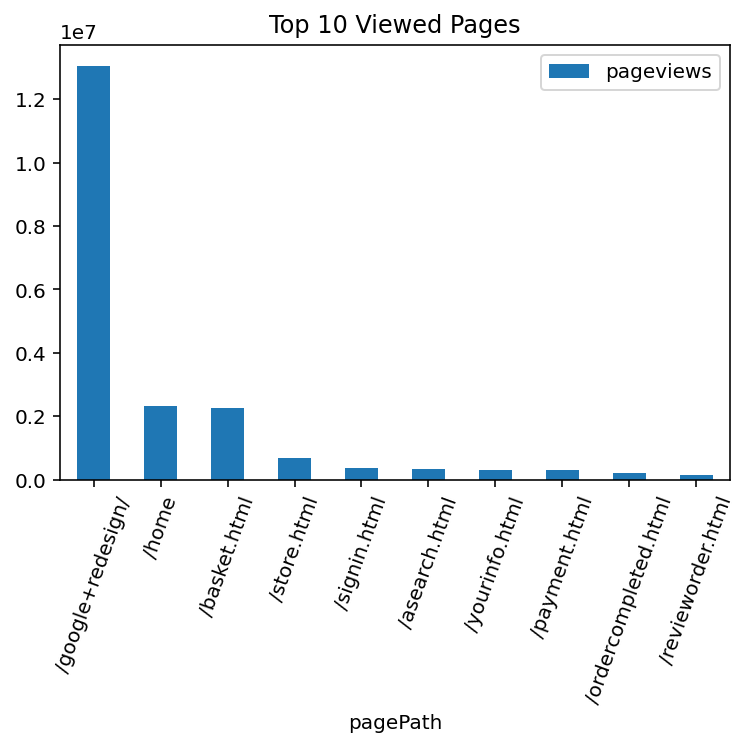

In [21]:
# creating a bar chart of top 10 pages with most pageviews
df_4.plot.bar(x='pagePath', y='pageviews', rot=70, title='Top 10 Viewed Pages');
plt.show();

In [28]:
bounce_rate = """
SELECT
total_visits,
source,
 round(( ( total_no_of_bounces / total_visits ) * 100 ),2) AS bounce_rate
FROM (
SELECT
date AS date,
trafficSource.source AS source,
COUNT (fullVisitorId) AS total_visits,
SUM ( totals.bounces ) AS total_no_of_bounces
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE _table_suffix BETWEEN '20170701'
AND '20170730'
GROUP BY
source,
date)
ORDER BY
--ordering by total visits we can get sources who bringed the most traffic into the site. 
date,
total_visits DESC
LIMIT 10

"""
safe_query_job= client.query(bounce_rate)
bounce_rate_df= safe_query_job.to_dataframe()
bounce_rate_df

,total_visits,source,bounce_rate
0,1172,google,56.57
1,335,(direct),54.03
2,255,m.facebook.com,59.61
3,162,youtube.com,74.69
4,46,facebook.com,47.83
5,19,analytics.google.com,68.42
6,17,Partners,64.71
7,8,baidu,75.00
8,7,google.com,28.57
9,5,quora.com,100.00


In [ ]:
n=bounce_rate_df["total_visits"]
plt.figure (figsize=(15,5))
ax = bounce_rate_df["total_visits"].plot(kind='bar', use_index=True, )
ax2 = ax.twinx()
ax2.plot(bounce_rate_df["bounce_rate"].values, linestyle='-', marker='o', linewidth=2.0,color="red")
ax.set_xticklabels(('google', 'direct', 'm.facebook.com', 'youtube.com', 'facebook.com', 'analytics.google', 'partners', 'baidu', 'google.com', 'quora.com'))
ax.set_xlabel('source')
ax.set_ylabel("Pageviews")
ax.set_title('Bounce rate based on source', pad=15, color='#333333',
             weight='bold')
#Making labels for bar chart
rects= ax.patches
labels = bounce_rate_df["total_visits"]

for rect,label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/ 2, height + 5, label,
            ha='center', va='bottom')
#Making labels for line chart 
for i, j in bounce_rate_df.bounce_rate.items():
    ax2.annotate(str(j), xy=(i,j))

### Abandoned Cart Rate

In [22]:
# create a data frame calling action features
query = """
    SELECT
        hits.eCommerceAction.action_type AS actions,
        COUNT(fullVisitorId) AS total_hits
    FROM
      `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
      UNNEST(hits) AS hits,
      UNNEST(hits.product) AS product
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
    AND
        (hits.ecommerceaction.action_type != '0' AND hits.ecommerceaction.action_type != '4' AND hits.ecommerceaction.action_type != '3')
    GROUP BY 
        1
    ORDER BY 1
"""
safe_query_job = client.query(query)
df_5 = safe_query_job.to_dataframe()
df_5.head()

,actions,total_hits
0,1,111457
1,2,92030
2,5,60395
3,6,19802


In [23]:

# define action types. Action types can be found in BigQuery Export schema: https://support.google.com/analytics/answer/3437719?hl=en
df_5['actions'] = df_5['actions'].astype(str) # convert action types to string

df_5['actions'] = df_5['actions'].replace(['0','1','2','3','4','5','6'],['Unknown', 
                                                                     'Click through of product lists', 
                                                                     'Product detail views', 
                                                                     'Add product(s) to cart',
                                                                     'Remove products from cart',
                                                                     'Check out',
                                                                     'Completed purchase'])
df_5

,actions,total_hits
0,Click through of product lists,111457
1,Product detail views,92030
2,Check out,60395
3,Completed purchase,19802


In [24]:
# creating a funnel visualization
fig = go.Figure(go.Funnel(
    y = df_5['actions'],
    x = df_['total_hits'],
    textposition = 'inside',
    textinfo = 'value+percent initial'))

fig.update_layout(title_text = 'Shopping Cart Abandonment')

fig.show()